# Градиентный спуск

$$ f(x) \to \min_x $$
$$ x^{t+1} = x^t - \alpha f'(x^t)$$
$$ f(x^{t+1}) = f(x^t - \alpha f'(x^t) $$

## Пример

$ f(X) = 10 \cdot \sum_{i,j}x_{ij}^2 $

$$ f'(X)_x = ? $$

Мы хотим посчитать производную функции по всем компонентам данного тензора.

Возьмем компонент $x_{k,l}$ и посчитаем по нему производную.

$$ f'(X)_{x_{kl}} = 2 \cdot 10 \cdot x_{kl} = 20 x_{kl}  $$
$$ f'(X)_x = 20X $$

*Производная по тензору имеет размер такойже как у тензора*

In [26]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [27]:
x = torch.tensor([
    [1., 2., 3., 4.],
    [5., 6., 7., 8.]
],
    requires_grad=True) # указывает, что по этому тензору 
                        # будем брать производную

device = torch.device('cuda:0' 
                      if torch.cuda.is_available() else 
                      'cpu')
x = x.to(device)

function = 10 * (x ** 2).sum()
function.backward() # считает производную, 
                    # результат записывается в атрибут x.grad
    
#градиентый шаг
x.data -= 0.001 * x.grad # так как мы считаем градиент по x
                         # x.data позволяет обновить тензор
                         # не влияя на вычисление производной по x
x.data.zero_() # в PyTorch градиенты не обновляются после 
               # градиентных шагов (они суммируются, то есть 
               # результатом будет сумма предыдущего и текущего 
               # градиента). Что бы избежать этого нужно обнулять 
               # градиент
    

print(x.grad)

tensor([[ 20.,  40.,  60.,  80.],
        [100., 120., 140., 160.]])


---

In [90]:
def show_contours(objective,
                 x_lims=[-10.0, 10.0],
                 y_lims=[-10.0, 10.0],
                 x_ticks=100,
                 y_ticks=100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step,
                    y_lims[0]:y_lims[1]:y_step]
    res = []
    for x_index in range(X.shape[0]):
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val,
                                                y_val]]).T))
    res = np.array(res)
    
    #plt.figure(figsize=(7, 7))
    plt.contour(X, Y, res, 100)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

In [68]:
x = torch.tensor(
    [8., 8.,], requires_grad=True)
var_history = []
fn_history = []

optimizer = torch.optim.SGD([x], lr=0.001)

def function_parabola(variable):
    return 10 * (variable ** 2).sum()

def make_gradient_step(function, variable):
    function_result = function(variable) 
    function_result.backward()
    optimizer.step()
    optimizer.zero_grad()
    
for i in range(500):
    var_history.append(x.data.cpu().numpy().copy())
    fn_history.append(function_parabola(x).data.cpu().numpy().copy())
    make_gradient_step(function_parabola, x)

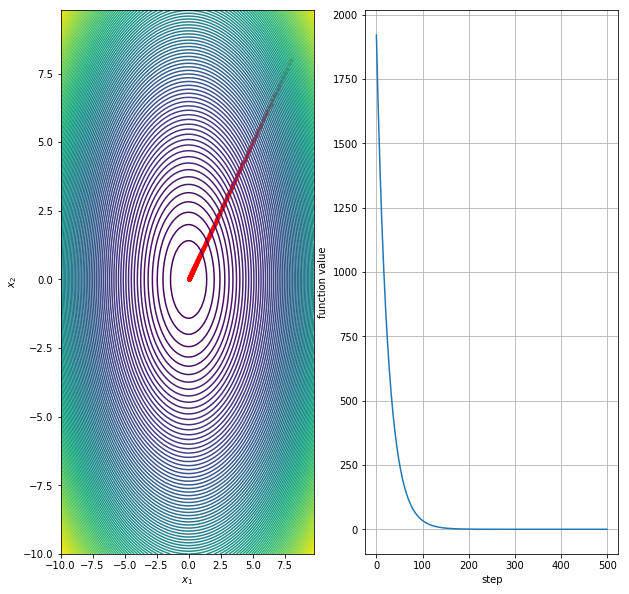

In [100]:
plt.figure(figsize=(10,10))

plt.subplot(1, 2, 1)
show_contours(function_parabola)
plt.scatter(np.array(var_history)[:,0], 
            np.array(var_history)[:,1], s=10, c='r');
plt.subplot(1, 2, 2)
plt.plot(fn_history);
plt.grid()
plt.xlabel('step')
plt.ylabel('function value');


In [25]:
x.grad

tensor([0., 0.])